In [ ]:
import pandas as pd

Vamos a mandar a tarer nuestros datos

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv")

In [ ]:
data

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789
...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818


Para implementar el modelo me Machine Learning necesitaremos algunas librerias que nos van a ayudar a aplicar directamente varios algoritmos

In [ ]:
pip install scikit-learn

Queremos predecir PM10 a travez de otra variable y OJO-> usamos dobles corchetes en la variable independiente

In [13]:
X=data[['CO','NOX']] #variable independiente
y=data['PM10'] #variable dependiente

necesitamos entrenar al modelo con un porcentaje de datos (80 -20)

In [14]:
split_index= int(len(data)*0.8) #len medice la longitud de los datos y int hace referencia a "entero"

No lo ponemos aleatorio porque queremos encontrar el patrón que se puede seguir

In [15]:
X_train=X.iloc[:split_index]
X_test= X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

Ahora va la reegresión lineal

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Mandamos a llamar a los coeficientes

In [18]:
y_pred=model.predict(X_test)

In [19]:
coeficientes= pd.DataFrame({
  'Variable':X.columns,
  'Coeficientes':model.coef_

})

Veamos los coeficientes y saldrán en una tablita

In [20]:

print(coeficientes)

  Variable  Coeficientes
0       CO      -4.42238
1      NOX       0.74793


In [21]:
print(f"Intercepto:{model.intercept_}")

Intercepto:15.394050316557077


¿Qué tan bueno o malo es mi modelo?
Lo veremos con las métricas que tenemos

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2=r2_score(y_test, y_pred)

Pedimos a r2
OJO
¿qué tan bueno ?
Pues r2 debería ser cercano a 1

In [23]:
r2

0.4051483156923722

In [24]:
rmse=mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Si lo genero, ahora si lo quiero ver solo escribo lo siguiente

In [26]:
rmse

11.015555045398493

También podemos calcular el error absoluto

In [27]:
mae=mean_absolute_error(y_test, y_pred)

In [28]:
mae

8.77187127970108

AHora puedo ver los datos

In [29]:
y_pred

array([35.84322788, 35.16986591, 27.93741429, 36.63817377, 41.13384142,
       41.06242395, 42.75638277, 44.17721444, 41.37719193, 25.82155189,
       29.04508134, 29.73548446, 32.63938451, 33.26152794, 37.54453601,
       31.04669963, 32.62612718, 42.79223458, 44.49395668, 46.49808759,
       44.54137796, 39.69857864, 29.54418195, 25.75107461, 40.48770376,
       43.21548707, 40.28825791, 30.60020619, 33.59204026, 36.88470139,
       31.9400362 , 51.05169762, 46.68372588, 40.86591425, 49.42332902,
       46.26082727, 47.17695499, 39.32150203, 41.74288829, 41.65078904,
       54.44211195, 48.85309131, 43.87679743, 44.1830246 , 33.8194889 ,
       42.91702292, 44.68183935, 50.51921234, 46.307285  , 41.39198454,
       32.1379949 , 31.89452241, 35.88945277, 54.38695419, 53.14398519,
       50.37495549, 33.42907716, 37.13424237, 35.02935838, 33.6375235 ,
       34.46112397, 47.26249987, 48.58843081, 35.47889646, 49.67038674,
       39.44255202, 39.29978144, 53.18432663, 51.63623227, 49.73

Ahora importamos los datos

In [30]:
import matplotlib.pyplot as plt

Los residuos serán los valores de la predicción

In [31]:
residuos= y_test- y_pred

Y los graficamos

Text(0, 0.5, 'Frecuencia')

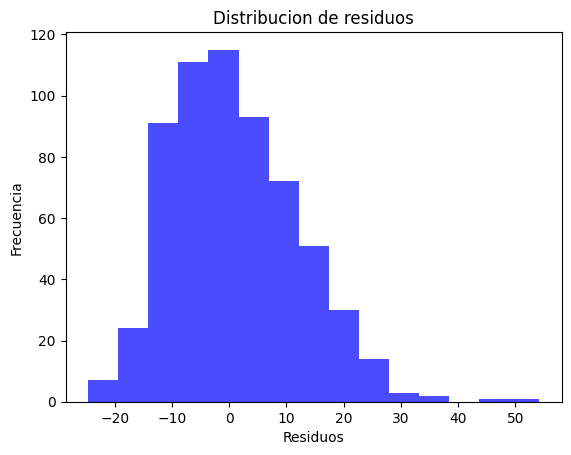

In [32]:
plt.hist(residuos, bins=15, color='blue', alpha=0.7)
plt.title('Distribucion de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

Para una mejor descripción

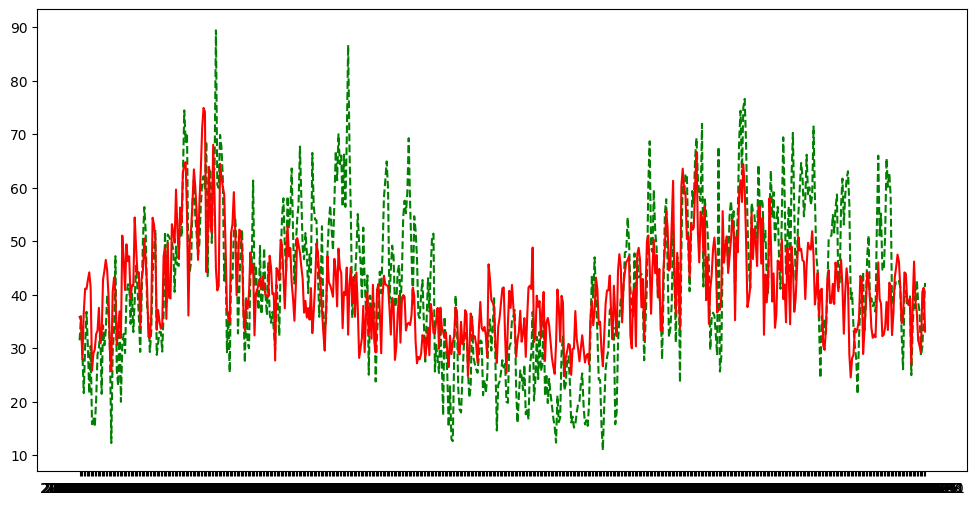

In [33]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]['fecha'], y_test, linestyle='--', color='green')
plt.plot(data.iloc[split_index:]['fecha'], y_pred, linestyle='-', color='red')

Veamos con Co y PM25 para predecir MP10

In [35]:
X=data[['CO','PM25']] #variable independiente
y=data['PM10'] #variable dependiente

In [36]:
split_index= int(len(data)*0.8) #len medice la longitud de los datos y int hace referencia a "entero"

In [37]:
X_train=X.iloc[:split_index]
X_test= X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [38]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred=model.predict(X_test)

In [40]:
coeficientes= pd.DataFrame({
  'Variable':X.columns,
  'Coeficientes':model.coef_

})

In [41]:
print(coeficientes)

  Variable  Coeficientes
0       CO      9.262045
1     PM25      1.444529


In [42]:
print(f"Intercepto:{model.intercept_}")

Intercepto:5.9499520374643495


In [43]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2=r2_score(y_test, y_pred)

In [44]:
r2

0.6486499728340047

Salio mejor

In [45]:
rmse=mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [46]:
rmse

8.465878531743629

In [47]:
mae=mean_absolute_error(y_test, y_pred)

In [48]:
mae

6.633563738473029

Los residuos

In [49]:
residuos= y_test- y_pred

El grafico

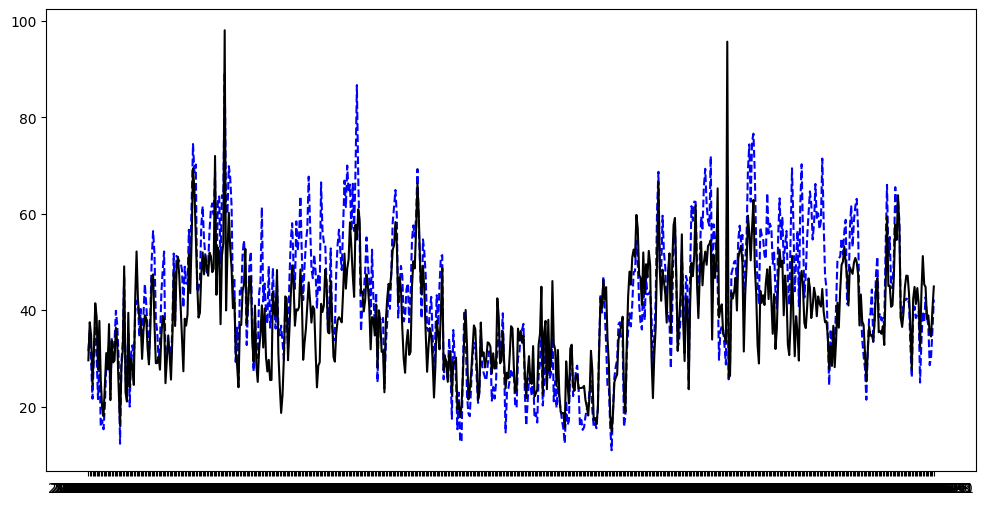

In [50]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]['fecha'], y_test, linestyle='--', color='blue')
plt.plot(data.iloc[split_index:]['fecha'], y_pred, linestyle='-', color='black')

Para Random Forest

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Vamos a dividir los datos, los nuestros ya lo están, pero la instruccion "data.sort_values(by=name)" nos ayuda a hacerlo

In [52]:
data=data.sort_values(by='fecha') #ordena por fecha
split_index=int(len(data)*0.8) # da índice
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [53]:
rf_model=RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42) #aquí están mis hiperparámetros
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [54]:
y_pred=rf_model.predict(X_test)

que los muestre

In [55]:
y_pred

array([29.5120525 , 38.72275228, 33.33765582, 23.77812084, 31.07766639,
       42.09973233, 39.36333681, 26.04706026, 38.5883252 , 25.05350059,
       18.98373795, 17.13641718, 23.73195909, 30.37775455, 26.34858947,
       37.90671552, 20.51277787, 32.18152869, 27.4997043 , 27.4997043 ,
       35.01123911, 32.1222181 , 24.80794321, 15.10121162, 26.62050329,
       31.14813312, 52.759942  , 22.56649699, 20.47669465, 40.23800863,
       22.94780905, 27.67693692, 27.23826634, 22.65458505, 42.39308832,
       53.98873091, 42.9429743 , 39.22165578, 38.37403344, 29.55021192,
       34.44376022, 39.6611833 , 38.86556218, 31.00991833, 27.66942915,
       37.04587665, 49.72848537, 48.91472769, 37.99313513, 26.92204378,
       30.25292958, 30.35616083, 26.37725335, 33.46266796, 39.46353471,
       38.87773682, 25.00441162, 30.25512646, 33.02289643, 30.47262936,
       25.15758199, 32.62766882, 49.39702029, 37.88843447, 49.66384135,
       51.93794101, 49.72848537, 41.47753308, 33.27050262, 26.73

Tratamos de encontrar las métricas

In [56]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2=r2_score(y_test, y_pred)

In [57]:
r2

0.6596692108217805

In [58]:
rmse=mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [59]:
rmse

8.332065159315201

In [60]:
mae=mean_absolute_error(y_test, y_pred)

In [61]:
mae

6.501842502572446

Graficamos la información

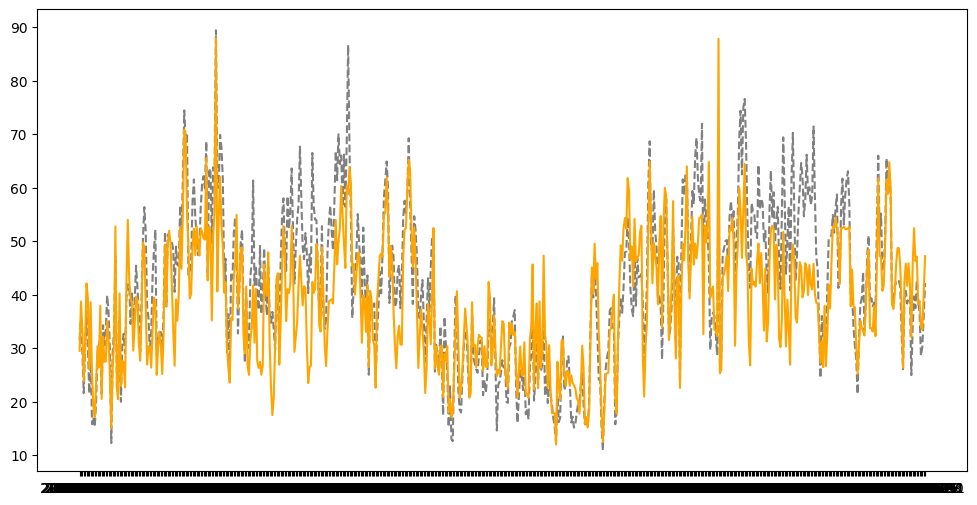

In [63]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]['fecha'], y_test, linestyle='--', color='gray')
plt.plot(data.iloc[split_index:]['fecha'], y_pred, linestyle='-', color='orange')